# Acidentes nas rodovias federais brasileiras em 2020

**Integrantes:** José Ítalo Alves de Oliveira Vitorino, Vitor Zimbrunes Pamplona, João de Aquino Lopes Neto

## Introdução

**Esse projeto teve como principal motivação analisar e obter respostas, de como, quando e onde mais ocorrem acidentes nas rodovias federais. Assim como ver a evolução desses incidentes no decorrer do ano.**

## Dados

**A base de dados usada foi a** *datatran2020.csv* **uma parte de uma base do kaggle upado pela polícia federal, nesses dados se tem 31 dimensões, desde data do acidente até tipo de pista onde ocorreu o mesmo.**

**Inicialmente nós importamos a biblioteca pandas, essa que é onde se tem a maioria das ferramentas usadas nessa análise, também foi importada a seaborn com o intuíto de modificar a interface dos gráficos para ficarem mais amigáveis.**

In [1]:
import pandas as pd

import seaborn as sns
sns.set_palette('Set2')


ModuleNotFoundError: No module named 'seaborn'

**Após inicializarmos nosso dataframe ao ler o arquivo em csv, utilizamos o comando .head() da biblioteca pandas para ter uma noção inicial de como é a base.**

In [226]:
df = pd.read_csv('datatran2020-worked.csv')

df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,678.1,GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,-11.774602,-49.107450,SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178.0,NOVA IGUACU,Falta de Aten��o do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,-22.752230,-43.437910,SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,206.9,SAO JOSE,Ingest�o de �lcool,Colis�o lateral,...,0,1,0,1,2,-27.591935,-48.618246,SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236.0,CACOAL,Velocidade Incompat�vel,Sa�da de leito carro��vel,...,1,0,0,1,1,-11.446246,-61.437612,SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360.0,REBOUCAS,Ingest�o de �lcool,Capotamento,...,4,0,0,6,1,-25.675038,-50.750898,SR-PR,DEL7/3,UOP04/PR


**Depois de ver como é a base, iremos nos aprofundar um pouco mais nela usando o comando .info() para receber um sumario dos dados**

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45368 entries, 0 to 45367
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      45368 non-null  float64
 1   data_inversa            45368 non-null  object 
 2   dia_semana              45368 non-null  object 
 3   horario                 45368 non-null  object 
 4   uf                      45368 non-null  object 
 5   br                      45253 non-null  float64
 6   km                      45253 non-null  float64
 7   municipio               45368 non-null  object 
 8   causa_acidente          45368 non-null  object 
 9   tipo_acidente           45368 non-null  object 
 10  classificacao_acidente  45368 non-null  object 
 11  fase_dia                45368 non-null  object 
 12  sentido_via             45368 non-null  object 
 13  condicao_metereologica  45368 non-null  object 
 14  tipo_pista              45368 non-null

## Pré-Processamento de dados

**O primeiro passo de todo o projeto, foi alterar um pouco a formatação dos dados, pois estavam em outro tipo de codificação, tivemos que converter para utf-8(Essa conversão foi feita em outro programa), e como a maioria
dos dados brasileiros os números float estavam separados por ',' e não '.', assim precisamos dar um replace,e as colunas separadas por ';', o que precisou de outro replace**. 

In [228]:
# with open('datatran2020.csv', 'r') as f:
#     result = str(f.read())
#     result = result.replace(",",".")
#     result = result.replace(";",",")
#     f.close
    
# with open('datatran2020-worked.csv', 'w') as f:
#     f.write(result)
#     f.close

**Utilização de isna().sum() para detectar os valores nulos dos dados.**

In [229]:
df.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        115
km                        115
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
uop                       399
dtype: int64

**Atualizando o numero das brs e kilometros, definindo os valores vazios da coluna uop como não cadastrado e trasformando a coluna br em inteiro.**


In [230]:
df.update(df[['br','km']].fillna('0'))
df.update(df[['uop']].fillna('nao cadastrado'))
df = df.astype({'br': int})

df.br.head()

0    153
1    116
2    101
3    364
4    153
Name: br, dtype: int64

In [231]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

df['data_inversa'].head()

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: data_inversa, dtype: datetime64[ns]

## Visualização dos Dados

**Utilizamos essa parte para respondermos perguntas mais básicas, como...**

**A média de pessoas envolvidas em acidentes**

In [232]:
df.pessoas.mean()

2.3008067360253923

**Lista dos acidentes categorizados por causa do acidente, e com os numeros de pessoas, mortos, feridos, ilesos, ignorados e veiculos organizados de forma decrescente na coluna mortos.**


In [233]:
acidentes = df[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','ignorados','veiculos','causa_acidente' ]].groupby(by = 'causa_acidente').sum().sort_values(by = 'mortos', ascending = False)

acidentes

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,veiculos
causa_acidente,,,,,,,
Falta de Aten��o � Condu��o,36548,860,14011,3869,15398,2410,27388
Desobedi�ncia �s normas de tr�nsito pelo condutor,16422,599,5345,2127,7029,1322,12312
Velocidade Incompat�vel,8766,517,3673,1234,2779,563,5736
Falta de Aten��o do Pedestre,2836,403,549,492,977,415,1333
Ingest�o de �lcool,7941,225,2429,829,3862,596,5729
Ultrapassagem Indevida,2583,221,826,423,909,204,1622
Condutor Dormindo,3097,180,1379,444,973,121,1981
Desobedi�ncia �s normas de tr�nsito pelo pedestre,715,90,138,108,255,124,341
Defeito Mec�nico no Ve�culo,5206,87,2022,380,2501,216,3442


**Utilizamos as medidas de centralidade e dispersão para conhecer como está nossos dados de númericos. Em seguida printamos uma tabela com essas informações e um gráfico que pode ser mais fácil de se entender esses dados**

In [234]:

measures = pd.DataFrame()

measures['Máximo'] = df.select_dtypes(include=['int64']).max()

measures['Média'] = df.select_dtypes(include=['int64']).mean()

measures['Mediana'] = df.select_dtypes(include=['int64']).median()

d = df.select_dtypes(include=['int64']).mode()

measures['Moda'] = d.iloc[0] 

measures['Desvio Padrão'] = df.select_dtypes(include=['int64']).std()

measures = measures.drop(['br'])

measures
              



,Máximo,Média,Mediana,Moda,Desvio Padrão
pessoas,73,2.300807,2.0,2,1.700060
mortos,12,0.081048,0.0,0,0.332745
feridos_leves,42,0.851658,1.0,1,1.013929
feridos_graves,17,0.260999,0.0,0,0.585655
ilesos,73,0.951023,1.0,1,1.330344
ignorados,11,0.156079,0.0,0,0.431112
feridos,44,1.112656,1.0,1,1.112366
veiculos,23,1.626852,2.0,1,0.724634


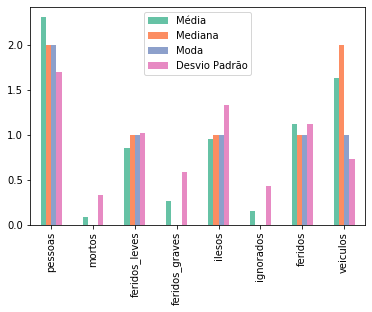

In [235]:
measures.iloc[:,1:].plot.bar()

**Usando a função .boxplot() para plotar os boxplots do dataframe formado pelas colunas numéricas.**

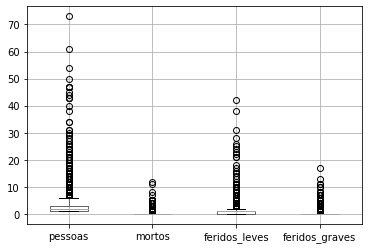

In [236]:
df.select_dtypes(include=['int64']).iloc[:,1:5].boxplot()

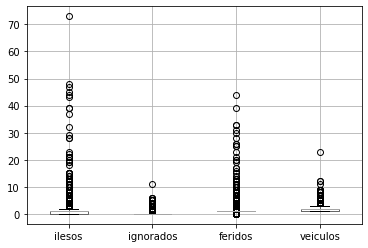

In [237]:
df.select_dtypes(include=['int64']).iloc[:,5:].boxplot()

### Quais os principais tipos de acidentes nas rodovias federais?

**Ao verificar nossa tabela, com um mapa de calor temos respostas para todas as vertentes dessa pergunta, onde o tipo de acidente mais ocorrido é a Colisão Traseira, também é esse tipo oque mais envolve pessoas, veículos e feridos, mas se tratando de mortos o tipo de acidente que mais tem mortos é a Colisão Frontal, isso se explica pois colisões frontais são bem mais violentas que as traseiras, nessa tabela também temos médias e porcentagens, para mostrar os tipos que tem maior índice, para o tipo que tem a maior média de pessoas e veículos por acidente, temos o Engavetamento, já aquele que tem a maior probabilidade de se ter uma morte é o Atropelamento ao Pedestre, sendo mais fatal que a Colisão Frontal, em termos de violência esses dois tipos são os mais perigosos, e por último o que deixa a maior porcentagem de feridos é a Queda de ocupante do veículo, que apesar de ter um grande número de feridos tem um baixo indíce de mortes. Ademais temos gráficos para tentar deixar a visualização dos dados mais simples, o primeiro tem o número de acidentes, e o segundo o número de pessoas,mortos e veículos.**


In [283]:
tipos = df[['pessoas','mortos','feridos','veiculos','tipo_acidente']].groupby('tipo_acidente').sum()

tipos['n_acidentes'] = df.groupby('tipo_acidente').size()
tipos = tipos.sort_values(by= 'n_acidentes',ascending = False)
tipos['mortos %'] = tipos['mortos']/tipos['pessoas']
tipos['feridos %'] = tipos['feridos']/tipos['pessoas']
tipos['média pessoas'] = tipos['pessoas']/tipos['n_acidentes']
tipos['média veículos'] = tipos['veiculos']/tipos['n_acidentes']

format_dict = {'mortos %':'{:.2%}', 'feridos %':'{:.2%}', 'média pessoas': '{:.2f}', 'média veículos': '{:.2f}'}

tipos[['n_acidentes','pessoas','média pessoas','mortos','mortos %','feridos','feridos %','veiculos','média veículos']].style.format(format_dict).background_gradient(cmap='PuBuGn')

,n_acidentes,pessoas,média pessoas,mortos,mortos %,feridos,feridos %,veiculos,média veículos
tipo_acidente,,,,,,,,,
Colis�o traseira,8086,22716,2.81,396,1.74%,8793,38.71%,17497,2.16
Sa�da de leito carro��vel,7445,13212,1.77,494,3.74%,8262,62.53%,7854,1.05
Colis�o transversal,5608,14992,2.67,273,1.82%,7182,47.91%,11383,2.03
Colis�o lateral,5279,14100,2.67,200,1.42%,5739,40.70%,11083,2.10
Tombamento,4058,5869,1.45,166,2.83%,4303,73.32%,4452,1.10
Colis�o com objeto est�tico,3526,5993,1.70,201,3.35%,3264,54.46%,4064,1.15
Colis�o frontal,3068,10015,3.26,1129,11.27%,4841,48.34%,6546,2.13
Atropelamento de Pedestre,2078,4980,2.40,627,12.59%,1961,39.38%,2261,1.09
Queda de ocupante de ve�culo,2051,2958,1.44,57,1.93%,2383,80.56%,2284,1.11


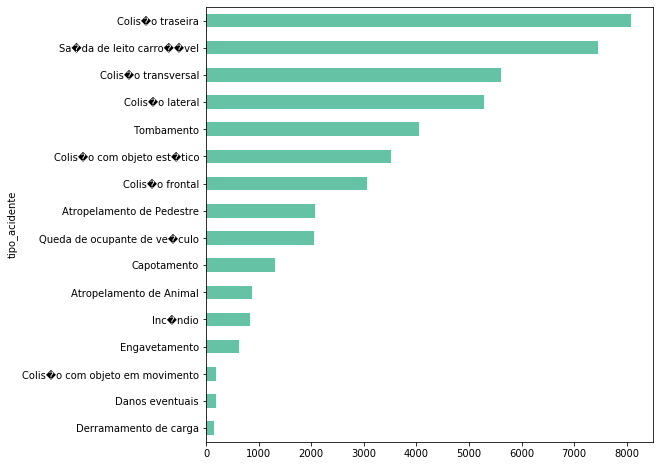

In [272]:
types = df.groupby('tipo_acidente').size().sort_values(ascending = True)


types.plot.barh(figsize=(8,8))

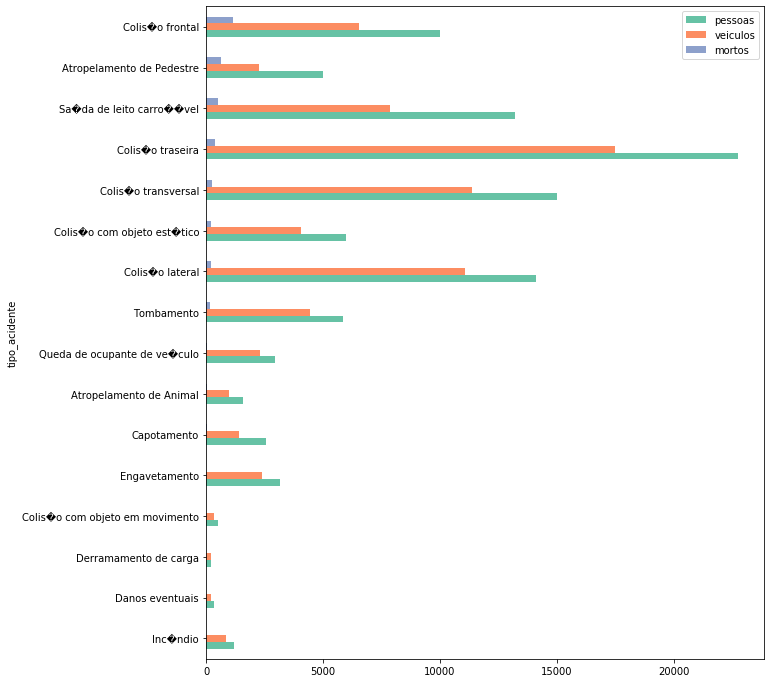

In [273]:
tipos = tipos.sort_values(by= 'mortos',ascending = True)

tipos[['pessoas','veiculos','mortos']].plot.barh(figsize=(10,12))

### Quais os 20 municipios que mais ocorrem acidentes em rodovias federais?

**Usamos o mesmo tipo de organização da análise passada, só que dessa vez a dimensão foi os municipios, aqui podemos verificar que uma cidade conseguiu liderar todos os índices númericos, Brasilia é a cidade que mais teve número de acidentes, pessoas envolvidas, mortos, feridos e veiculos, porém nas médias e porcentagens não liderou nenhuma, a cidade com maior média de pessoas por acidente é BETIM, já a com maior porcentagem de mortos é CASCAVEL, a com maior porcentagem de feridos é Uberaba, e a que tem mais veículos envolvidos por acidente é SAO JOSE**

In [330]:
cities = df[['pessoas','mortos','feridos','veiculos','municipio']].groupby('municipio').sum()

cities['n_acidentes'] = df.groupby('municipio').size()

cities = cities.sort_values(by= 'n_acidentes',ascending = False)[:20]
cities['mortos %'] = cities['mortos']/cities['pessoas']
cities['feridos %'] = cities['feridos']/cities['pessoas']
cities['média pessoas'] = cities['pessoas']/cities['n_acidentes']
cities['média veículos'] = cities['veiculos']/cities['n_acidentes']

format_dict = {'mortos %':'{:.2%}', 'feridos %':'{:.2%}', 'média pessoas': '{:.2f}', 'média veículos': '{:.2f}'}

cities[['n_acidentes','pessoas','média pessoas','mortos','mortos %','feridos','feridos %','veiculos','média veículos']].style.format(format_dict).background_gradient(cmap='PuBuGn')

,n_acidentes,pessoas,média pessoas,mortos,mortos %,feridos,feridos %,veiculos,média veículos
municipio,,,,,,,,,
BRASILIA,757,1775,2.34,32,1.80%,785,44.23%,1292,1.71
CURITIBA,700,1561,2.23,30,1.92%,647,41.45%,1267,1.81
SAO JOSE,456,1003,2.20,2,0.20%,488,48.65%,872,1.91
GUARULHOS,452,1037,2.29,16,1.54%,452,43.59%,835,1.85
PALHOCA,426,942,2.21,7,0.74%,489,51.91%,772,1.81
SERRA,377,829,2.20,11,1.33%,412,49.70%,660,1.75
BETIM,373,927,2.49,12,1.29%,465,50.16%,663,1.78
DUQUE DE CAXIAS,373,837,2.24,19,2.27%,395,47.19%,616,1.65
PORTO VELHO,316,714,2.26,20,2.80%,303,42.44%,528,1.67


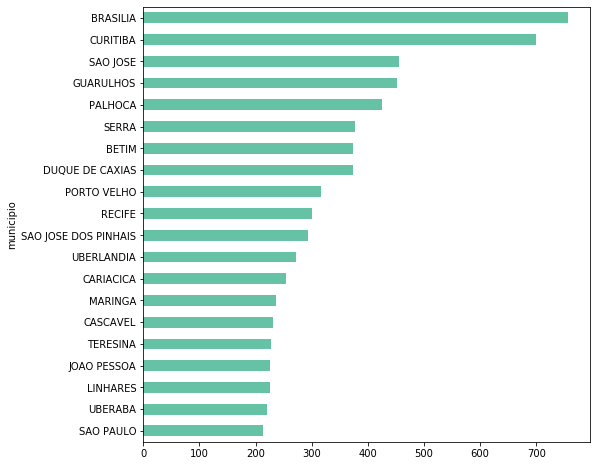

In [331]:
cities['n_acidentes'].sort_values(ascending = True).plot.barh(figsize= (8,8))

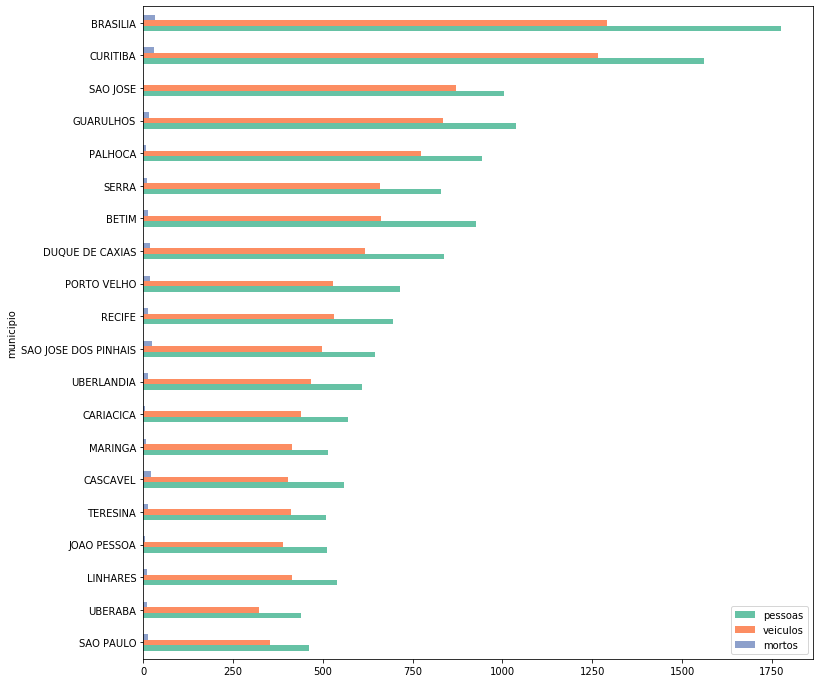

In [332]:
cities = cities.sort_values(by= 'n_acidentes',ascending = True)

cities[['pessoas','veiculos','mortos']].plot.barh(figsize=(12,12))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


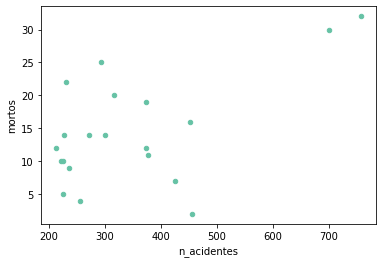

In [333]:
from sklearn.cluster import KMeans
import seaborn as sns

 
cities.plot.scatter(y = 'mortos', x = 'n_acidentes')

In [336]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(cities[['mortos','n_acidentes']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Ao agrupar as 20 cidades com mais acidentes, podemos observar que pelo número de mortos por número de acidentes, há uma certa variação, porém a um grupo que se destaca, onde se encontram Brasília e Curitiba, as cidades com mais acidentes e mortes no Brasil.**

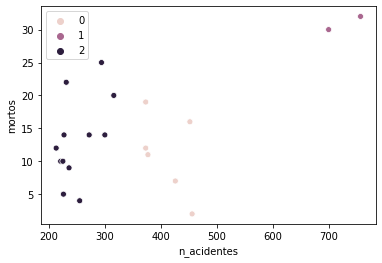

In [337]:
sns.scatterplot(data= cities, y = 'mortos', x = 'n_acidentes', hue= kmeans.labels_)

### Quais partes do dia que mais ocorrem acidentes e mortes em rodovias federais?

**Seguindo com o mesmo formato de análise, temos 4 fases do dia, onde a fase do dia com mais acidentes, pessoas, feridos e veiculos é o Pleno dia, já a fase com maior número de mortes é Plena Noite, já falando de porcentagens o Amanhecer tem a maior porcentagem de mortes e o Pleno dia a maior porcentagem de feridos, temos o Anoitecer com a maior média de veículos e pessoas por acidente. Adiante temos um gráfico em barra para melhor visualização dos dados, contendo o número de pessoas,veículos e mortos por acidente, e também temos um gráfico em pizza para cada uma dessas medidas.**

In [339]:
phases = df[['pessoas','mortos','feridos','veiculos','fase_dia']].groupby('fase_dia').sum()

phases['n_acidentes'] = df.groupby('fase_dia').size()

phases = phases.sort_values(by= 'n_acidentes',ascending = False)
phases['mortos %'] = phases['mortos']/phases['pessoas']
phases['feridos %'] = phases['feridos']/phases['pessoas']
phases['média pessoas'] = phases['pessoas']/phases['n_acidentes']
phases['média veículos'] = phases['veiculos']/phases['n_acidentes']

format_dict = {'mortos %':'{:.2%}', 'feridos %':'{:.2%}', 'média pessoas': '{:.2f}', 'média veículos': '{:.2f}'}

phases[['n_acidentes','pessoas','média pessoas','mortos','mortos %','feridos','feridos %','veiculos','média veículos']].style.format(format_dict).background_gradient(cmap='PuBuGn')


,n_acidentes,pessoas,média pessoas,mortos,mortos %,feridos,feridos %,veiculos,média veículos
fase_dia,,,,,,,,,
Pleno dia,24305,57048,2.35,1354,2.37%,28227,49.48%,40870,1.68
Plena Noite,16430,36660,2.23,1890,5.16%,17094,46.63%,25458,1.55
Anoitecer,2600,6298,2.42,184,2.92%,3044,48.33%,4477,1.72
Amanhecer,2033,4377,2.15,249,5.69%,2114,48.30%,3002,1.48


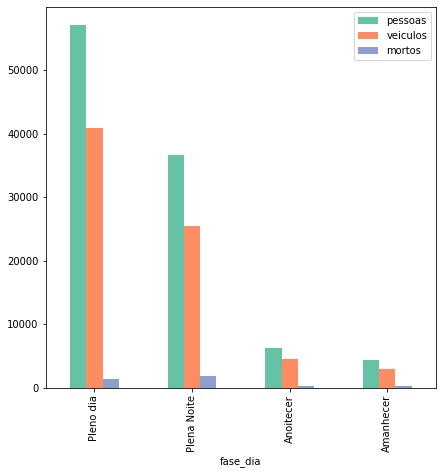

In [348]:
phases[['pessoas','veiculos','mortos']].plot.bar(figsize=(7,7))

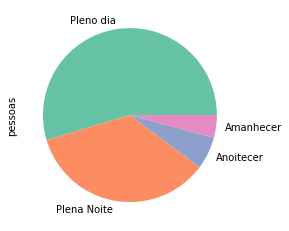

In [349]:
phases['pessoas'].plot.pie()

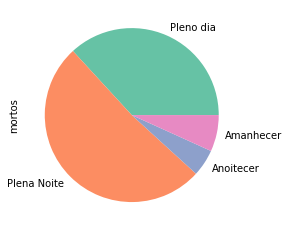

In [350]:
phases['mortos'].plot.pie()

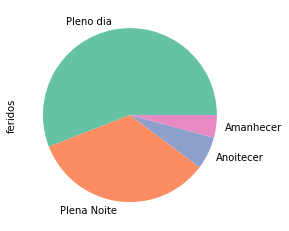

In [352]:
phases['feridos'].plot.pie()

### Análise de datas

**Ao se analisar as datas, principalmente a parte dos meses, se percebe uma queda considerável no número de acidentes, a causa dessa diminuição no número de acidentes é a pandemia ocasionada pelo covid-19. Já analisando os dias com mais acidentes, podemos ver que os 3 dias do fim de semana, sexta,sábado e domingo, dominam com os números mais alto de acidentes.**

In [353]:
df.groupby(df['data_inversa'].dt.strftime('%B')).size().sort_values(ascending = False).to_frame().rename(columns={0:'Quantidade'})

,Quantidade
data_inversa,
September,5629
August,5624
January,5497
February,5467
July,5117
March,4784
June,4723
May,4649
April,3878


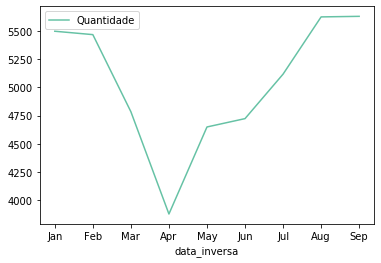

In [354]:
months = df.groupby(df['data_inversa'].dt.month).size().to_frame().rename(columns={0:'Quantidade'})

import calendar
months.rename(index= lambda x: calendar.month_abbr[x]).plot.line()

In [355]:
df.groupby('dia_semana').size().sort_values(ascending = False).to_frame().rename(columns={0:'Quantidade'})

,Quantidade
dia_semana,
s�bado,7476
domingo,7436
sexta-feira,7043
segunda-feira,6092
quarta-feira,5923
quinta-feira,5772
ter�a-feira,5626


## Conclusão

**Os resultados encontrados nos permite identificar que: o acidente mais recorrente nas rodovias é a colisão traseira e que a colisão frontal é o tipo mais mortal; O município com maior número de acidentes, pessoas, mortos, feridos e veículos é Brasília; A parte do dia com mais acidentes, pessoas, feridos e veículos é em pleno dia. Esses dados são de extrema importância para saber como podemos melhorar o trânsito nas rodovias federais e que mudanças devem ser feitas para diminuir o número de acidentes, com esses dados se tem mais precisam nos locais que mais necessitam das mudanças assim como horário e forma de acidente mais ocorrente. Com isso conseguimos responder as questões propostas para o trabalho, possíveis melhorias podem ser feitas como uma atualização do projeto a cada novo dado que o Detran fornece sobre o trânsito assim como pode-se incluir o trânsito dentro dos municípios. Uma das limitações foi a interpretação de alguns dados do Detran que é necessário uma maior análise sobre eles.**